# Prática 1 - Estatística descritiva

In [44]:
import numpy
import math
import pandas as pd
from statistics import stdev
from statistics import variance
from statistics import mean

### Questão 1


Criação da tabela de frequencias utilizando o ponto médio das classes de pressão siatólica em 'mm de Hg'

In [45]:
press_val = [90, 110, 130, 150, 170, 190]
freq_val = [30, 80, 40, 10, 4, 6]

table = pd.DataFrame( { 'pressao': press_val, 'frequencia': freq_val } )
total = sum(table['frequencia'].values)
print(table, '\n')
print('TOTAL:  ', total, '\n')

   pressao  frequencia
0       90          30
1      110          80
2      130          40
3      150          10
4      170           4
5      190           6 

TOTAL:   170 



#### a) A percentagem de mulheres que têm pressão igual ou maior que 120mm de Hg.

A frequencias simples de mulheres com pressão maior ou igual a 120 foi somada e dividida pelo total de mulheres da amostra, obtendo a frequencia relativa ( _fri = fi / n_ ) e multiplicada por 100 para obter a porcentagem. 

In [46]:
a_values = table.loc[table['pressao'] >= 120, ['frequencia']].values 
a = (sum(a_values)/total)*100

print('A percentagem é de', round(a[0]), '% (arredondado)')

A percentagem é de 35.0 % (arredondado)


###### b) O número de mulheres que têm pressão menor que 160 mm de Hg.

Soma de todos as frequencias das 4 primeiras classes (em que a pressão é menor que 160 mm de Hg)

In [47]:
b_values = table.loc[table['pressao'] < 160, ['frequencia']].values
b = sum(b_values)

print('O número de mulheres com pressão menor que 160 mm de Hg é', b[0])

O número de mulheres com pressão menor que 160 mm de Hg é 160


###### c) O número de mulheres (e a percentagem) que têm pressão igual ou maior que 100mm de Hg.

In [48]:
c_values = table.loc[table['pressao'] >= 100, ['frequencia']].values
c_num = sum(c_values)
c_perc = (c_num[0]/total)*100

print('O número de mulheres que têm pressão igual ou maior que 100mm de Hg é', c_num[0])
print('Sendo a percentagem igual a', round(c_perc), '% (arredondado)')

O número de mulheres que têm pressão igual ou maior que 100mm de Hg é 140
Sendo a percentagem igual a 82.0 % (arredondado)


###### d) Qual a pressão sistólica mais frequente?

In [49]:
most_frequent = 0
for index, row in table.iterrows():
    if row['frequencia'] > most_frequent:
        most_frequent = row['frequencia']
        press = row['pressao']
print('A pressão sistólica mais frequente é', press, 'tendo uma frequencia de', most_frequent)


A pressão sistólica mais frequente é 110 tendo uma frequencia de 80


###### e) O desvio padrão e o coeficiente de variação para a pressão sistólica

In [50]:
somatorio = 0
for index, row in table.iterrows():
    somatorio = somatorio + (row['pressao']*row['frequencia'])

X_ = somatorio / sum(freq_val)

print('A média de pessão sistólica é', X_)

desv_unit = 0
for index, row in table.iterrows():
    desv_unit = desv_unit + (row['frequencia'] * pow( row['pressao'] - X_, 2))
    
s = math.sqrt(desv_unit/sum(freq_val)-1)

print('O desvio padão é', s)

cv = s / X_
print('O coeficiente de variação é', cv*100)

A média de pessão sistólica é 117.76470588235294
O desvio padão é 22.541541812095197
O coeficiente de variação é 19.141169370910006


###### f) Construa o respectivo histograma.

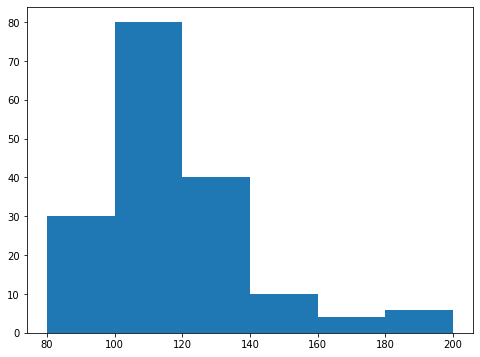

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(table['pressao'], bins=[80,100,120,140,160,180,200], weights=table['frequencia'])
plt.show()

### Questão 2

##### 1. Efetua-se um rol estatístico nos dados brutos, isto é, ordenar os dados em ordem crescente;

In [52]:
rol = sorted([9,12,10,8,11, 13, 10, 15, 9, 7, 14, 12, 9, 7, 15, 6, 4, 16, 18, 9,
19, 10, 20, 13, 8, 7, 17, 15, 14, 20, 21, 19, 22, 6, 5, 12, 15, 23, 19, 24,
15, 10, 12, 9, 15, 24, 6, 24, 13, 12])

In [53]:
print(rol)

[4, 5, 6, 6, 6, 7, 7, 7, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 11, 12, 12, 12, 12, 12, 13, 13, 13, 14, 14, 15, 15, 15, 15, 15, 15, 16, 17, 18, 19, 19, 19, 20, 20, 21, 22, 23, 24, 24, 24]


###### 2. Determina-se a amplitude total(AT) dos dados: AT = X max − X min em que Xmin e X max são os valores mínimo e máximo do conjunto de dados respectivamente.

In [54]:
at = max(rol) - min(rol)
print('Amplitude total dos dados:', at)

Amplitude total dos dados: 20


###### 3. Escolhe-se convenientemente o número de classes(K).

O número de classes determinado foi de 5 (pedido na questão)

In [55]:
k = 5

###### 4. Determinar a amplitude de classe(h)

In [56]:
h = round(at/k)
print('A amplitude de classe é:', h)

A amplitude de classe é: 4


###### 5. Efetua-se o agrupamento em classes e elabora-se a tabela de Distribuição de Freqüências.

In [57]:
cla = []
middle_point = []
l_inf = []
l_sup = []

# Menor valor da série
menor = min(rol)

# Menor valor somado a amplitude
menor_amp = menor+h

valor = menor
while valor < max(rol):    
    cla.append('{} - {}'.format(round(valor,1),round(valor+h,1)))
    l_inf.append(valor)
    l_sup.append(valor+h)
    middle_point.append(int((valor + (valor+h))/2))
    
    valor += h

print('Classes:', cla)
print('Pontos médios:', middle_point)
print('L superior:', l_sup)
print('L inferior', l_inf)

table_freq = pd.DataFrame( { 'Classes': cla, 'l. inferior': l_inf, 'l. superior': l_sup, 'ponto médio': middle_point } )
table_freq

Classes: ['4 - 8', '8 - 12', '12 - 16', '16 - 20', '20 - 24']
Pontos médios: [6, 10, 14, 18, 22]
L superior: [8, 12, 16, 20, 24]
L inferior [4, 8, 12, 16, 20]


,Classes,l. inferior,l. superior,ponto médio
0,4 - 8,4,8,6
1,8 - 12,8,12,10
2,12 - 16,12,16,14
3,16 - 20,16,20,18
4,20 - 24,20,24,22


In [58]:
freq_list = [0, 0, 0, 0, 0]
freq_acc = []

for number in rol:
    if number >= 4 and number < 8:
        freq_list[0] += 1
    
    elif number >= 8 and number < 12:
        freq_list[1] += 1
    
    elif number >= 12 and number < 16:
        freq_list[2] += 1
    
    elif number >= 16 and number < 20:
        freq_list[3] += 1
    
    elif number >= 20 and number <= 24:
        freq_list[4] += 1
        
print('Frequencias:', freq_list)

acc = 0
for f in freq_list:
    acc += f
    freq_acc.append(acc)
    
print('Frequencias acumuladas:', freq_acc)
    
table_freq['frequencia'] = pd.Series(freq_list, index=table_freq.index)
table_freq['frequencia acumulada'] = pd.Series(freq_acc, index=table_freq.index)

table_freq

Frequencias: [8, 12, 16, 6, 8]
Frequencias acumuladas: [8, 20, 36, 42, 50]


,Classes,l. inferior,l. superior,ponto médio,frequencia,frequencia acumulada
0,4 - 8,4,8,6,8,8
1,8 - 12,8,12,10,12,20
2,12 - 16,12,16,14,16,36
3,16 - 20,16,20,18,6,42
4,20 - 24,20,24,22,8,50


###### b) Desenhe o histograma e o polígono de frequências;

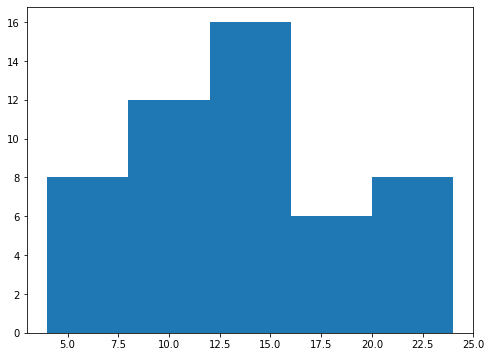

In [59]:
plt.figure(figsize=(8, 6))
plt.hist(table_freq['ponto médio'], bins=[4,8,12,16,20,24], weights=table_freq['frequencia'])
plt.show()

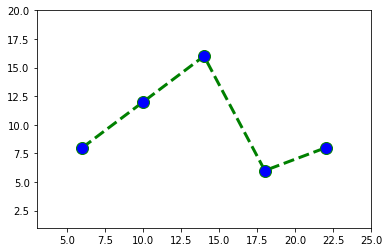

In [60]:
plt.plot(table_freq['ponto médio'], table_freq['frequencia'], color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
  
# setting x and y axis range 
plt.ylim(1,20) 
plt.xlim(3,25)
plt.show() 

###### c) Usando o item a), calcule os coeficientes de mortalidade médio, mediano e modal dos municípios.

In [61]:
# média
somatorio = 0
for index, row in table_freq.iterrows():
    somatorio = somatorio + (row['ponto médio']*row['frequencia'])

X_ = somatorio / sum(freq_list)
print('Coeficiente de mortalidade médio:', X_)

# mediana
freq_total = sum(table_freq['frequencia'].values)
pos_median = freq_total/2 # (n/2)

for index, row in table_freq.iterrows():
    if row['frequencia acumulada'] >= pos_median:
        
        linf_median = table_freq.loc[index, 'l. inferior']
        lsup_median = table_freq.loc[index, 'l. superior']
        h_median = lsup_median - linf_median
        freq_median = table_freq.loc[index, 'frequencia']
        freq_acc_ant = table_freq.loc[(index - 1), 'frequencia acumulada']
        
        break

median = linf_median + (((pos_median - freq_acc_ant) * h_median)/freq_median)

print('Coeficiente de mortalidade mediano: ', median)

# MODA

linf_moda = table_freq.loc[table_freq['frequencia'] == max(table_freq['frequencia'].values), 'l. inferior'].values
lsup_moda = table_freq.loc[table_freq['frequencia'] == max(table_freq['frequencia'].values), 'l. superior'].values
h_moda = lsup_moda - linf_moda
freq_modal = max(table_freq['frequencia'].values)
index_moda = table_freq.loc[table_freq['frequencia'] == freq_modal].index
delta1 = freq_modal - table_freq.loc[index_moda -1, 'frequencia'].values
delta2 = freq_modal - table_freq.loc[index_moda +1, 'frequencia'].values

moda = linf_moda + ((delta1*h_moda)/(delta1+delta2))

print('Coeficiente de mortalidade modal:', round(moda[0], 2))

Coeficiente de mortalidade médio: 13.52
Coeficiente de mortalidade mediano:  13.25
Coeficiente de mortalidade modal: 13.14
